# Data Pre-Processing

#### Import Packages and excel

In [1]:
# importing liabraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("default of credit card data.xls",header=1)

In [3]:
df.head().style.background_gradient(cmap='rainbow')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset


#### Check Null Values

In [4]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '%missing values')

In [5]:
features_with_na

[]

* **There are no null values in the dataset**

###  Other Data Cleaning steps

**Handling Duplicates**

In [6]:
df.duplicated().sum()

0

* **No Duplicates in the dataset**

**Remove id from the dataset as it cannot used in Model Training**

In [7]:
df.drop('ID', inplace=True, axis=1)

# Feature Engineering

## Feature Extraction

- importing date class from datetime module
- from datetime import date
  
- creating the date object of today's date
- todays_date = date.today()
- current_year= todays_date.year
- df['company_age'] = current_year-df['yr_of_estab']

### Type of Features

**Numeric Features**

In [8]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 24


**Categorical Features**

In [9]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 0


**Discrete features**

In [10]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))


We have 10 discrete features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']


**Continues Features**

In [11]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))


We have 14 continuous_features : ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [12]:
# renameing column Names

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

The "PAY_n" variables show how many months a payment is late. A value of "-1" meaning the payment was made on time according to the document. However, the meaning of "-2" and "0" is not clear. To make things clearer, it would be a good idea to consider "on-time payment" as 0

In [13]:
def replace_to_zero(col):
    fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
    df.loc[fil, col] = 0

for i in ["PAY_SEPT", "PAY_AUG", "PAY_JUL", "PAY_JUN", "PAY_MAY", "PAY_APR"]:
    replace_to_zero(i)

## Feature Selection

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)


In [14]:
#from scipy.stats import chi2_contingency
#chi2_test = []
#for feature in categorical_features:
 #   if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
  #      chi2_test.append('Reject Null Hypothesis')
   # else:
    #    chi2_test.append('Fail to Reject Null Hypothesis')
#result = pd.DataFrame(data=[categorical_features, chi2_test]).T
#result.columns = ['Column', 'Hypothesis Result']
#result

fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

### Check Multicollinearity in Numerical features

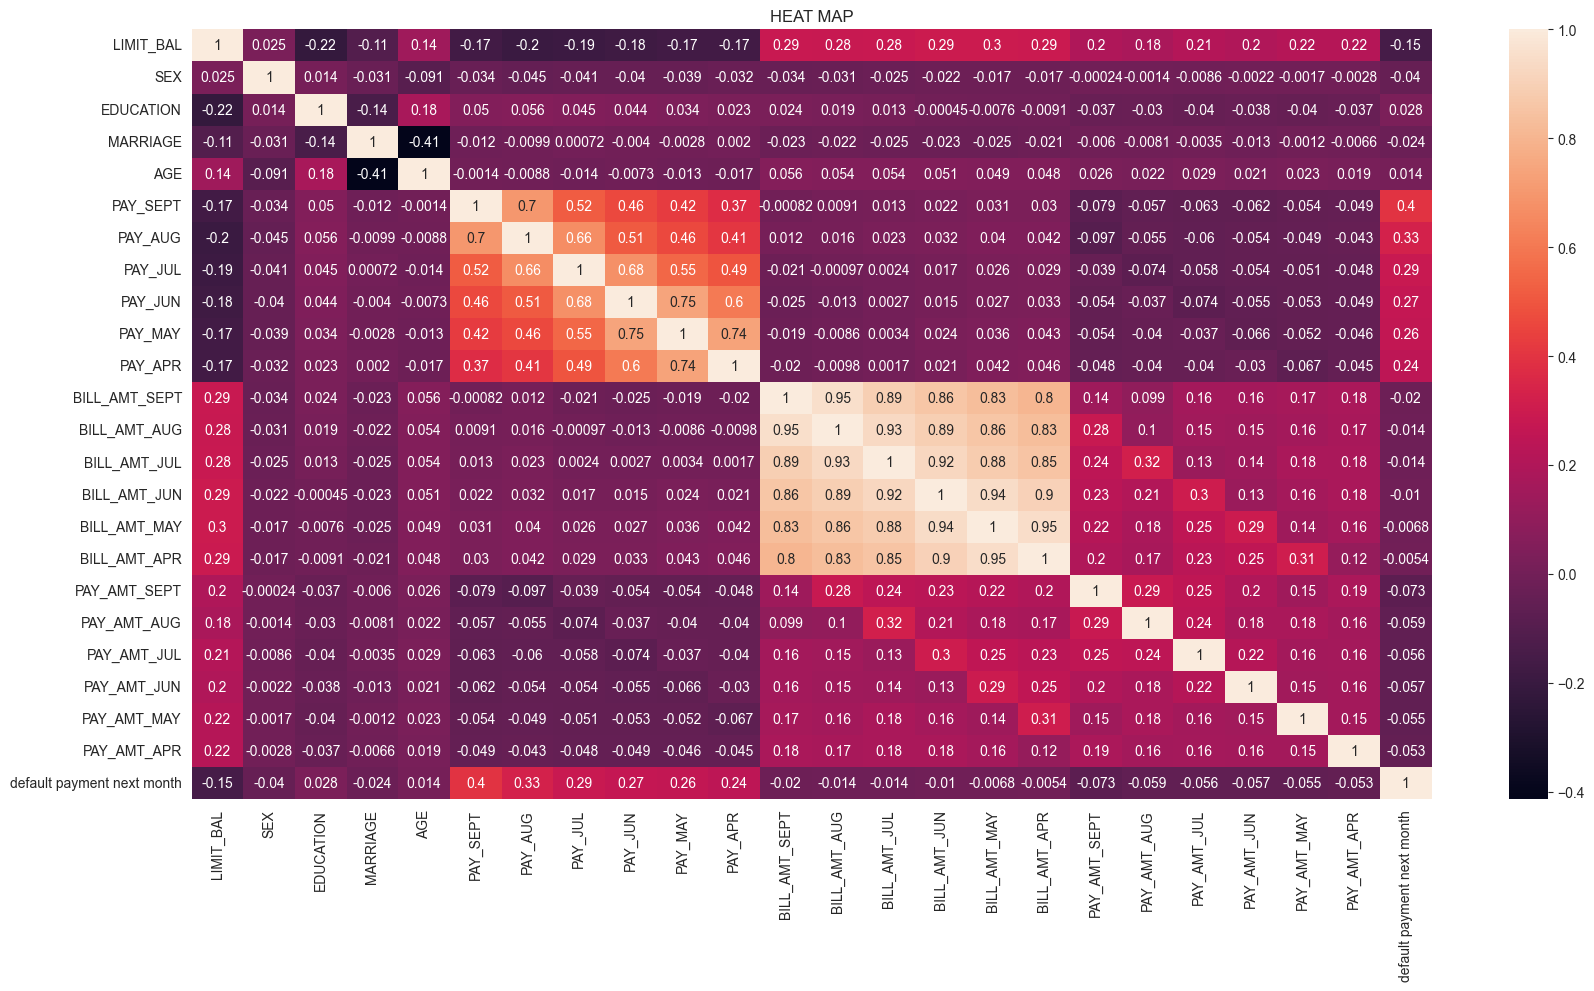

In [15]:
plt.figure (figsize= (20,10))
corelation= df.corr()
sns.heatmap(corelation, annot=True)
plt.title("HEAT MAP")
plt.show()

from The correlation or HEAP MAP model, we can see that the correlation between independent variables and dependent variables but some independent variables are correlated with another independent variables 

### what is VIF ?

- Variance inflation factor (VIF) can be used for feature selection in machine learning analysis. 

- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [16]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [17]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["default payment next month"]]])

,variables,VIF
0,LIMIT_BAL,3.580843
1,SEX,9.077174
2,EDUCATION,6.713202
3,MARRIAGE,6.299995
4,AGE,11.003443
5,PAY_SEPT,2.468666
6,PAY_AUG,3.036864
7,PAY_JUL,2.888469
8,PAY_JUN,3.311930
9,PAY_MAY,3.560418


In [18]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["default payment next month"]]])

,variables,VIF
0,LIMIT_BAL,3.580843
1,SEX,9.077174
2,EDUCATION,6.713202
3,MARRIAGE,6.299995
4,AGE,11.003443
5,PAY_SEPT,2.468666
6,PAY_AUG,3.036864
7,PAY_JUL,2.888469
8,PAY_JUN,3.311930
9,PAY_MAY,3.560418


In [19]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["default payment next month","BILL_AMT_AUG"]]])

,variables,VIF
0,LIMIT_BAL,3.579070
1,SEX,9.076375
2,EDUCATION,6.713200
3,MARRIAGE,6.299160
4,AGE,11.003380
5,PAY_SEPT,2.467644
6,PAY_AUG,3.036849
7,PAY_JUL,2.888217
8,PAY_JUN,3.311835
9,PAY_MAY,3.560370


In [20]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["default payment next month","BILL_AMT_AUG","BILL_AMT_MAY"]]])

,variables,VIF
0,LIMIT_BAL,3.575999
1,SEX,9.075399
2,EDUCATION,6.712432
3,MARRIAGE,6.298325
4,AGE,11.003083
5,PAY_SEPT,2.466816
6,PAY_AUG,3.036782
7,PAY_JUL,2.888162
8,PAY_JUN,3.311664
9,PAY_MAY,3.559946


In [21]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["default payment next month","BILL_AMT_AUG","BILL_AMT_MAY","BILL_AMT_JUL"]]])

,variables,VIF
0,LIMIT_BAL,3.572270
1,SEX,9.075399
2,EDUCATION,6.711630
3,MARRIAGE,6.298058
4,AGE,11.002727
5,PAY_SEPT,2.466609
6,PAY_AUG,3.036580
7,PAY_JUL,2.885945
8,PAY_JUN,3.311073
9,PAY_MAY,3.559788


In [22]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["default payment next month","BILL_AMT_AUG","BILL_AMT_MAY","BILL_AMT_JUL","BILL_AMT_JUN"]]])

,variables,VIF
0,LIMIT_BAL,3.569605
1,SEX,9.075086
2,EDUCATION,6.711539
3,MARRIAGE,6.297973
4,AGE,11.002617
5,PAY_SEPT,2.466426
6,PAY_AUG,3.036573
7,PAY_JUL,2.884929
8,PAY_JUN,3.310861
9,PAY_MAY,3.559749


In [23]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["default payment next month","BILL_AMT_AUG","BILL_AMT_MAY","BILL_AMT_JUL","BILL_AMT_JUN","AGE"]]])

,variables,VIF
0,LIMIT_BAL,3.115735
1,SEX,8.090269
2,EDUCATION,5.038321
3,MARRIAGE,6.156830
4,PAY_SEPT,2.462638
5,PAY_AUG,3.035631
6,PAY_JUL,2.884468
7,PAY_JUN,3.310139
8,PAY_MAY,3.559747
9,PAY_APR,2.519290


In [24]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["default payment next month","BILL_AMT_AUG","BILL_AMT_MAY","BILL_AMT_JUL","BILL_AMT_JUN","AGE","SEX"]]])

,variables,VIF
0,LIMIT_BAL,2.820129
1,EDUCATION,3.952620
2,MARRIAGE,4.514442
3,PAY_SEPT,2.460094
4,PAY_AUG,3.035615
5,PAY_JUL,2.884268
6,PAY_JUN,3.310138
7,PAY_MAY,3.559650
8,PAY_APR,2.518130
9,BILL_AMT_SEPT,4.564560


All  features are  selected  except this features ("BILL_AMT_AUG","BILL_AMT_MAY","BILL_AMT_JUL","BILL_AMT_JUN","AGE","SEX" )

In [25]:
df.drop(columns=["BILL_AMT_AUG","BILL_AMT_MAY","BILL_AMT_JUL","BILL_AMT_JUN","AGE","SEX"], inplace=True, axis=1)

In [26]:
df.columns

Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL',
       'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'default payment next month'],
      dtype='object')

In [27]:
df.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month
0,20000,2,1,2,2,0,0,0,0,3913,0,0,689,0,0,0,0,1
1,120000,2,2,0,2,0,0,0,2,2682,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,0,0,0,0,0,0,29239,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,0,0,0,0,0,0,46990,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,0,0,0,0,0,0,8617,19131,2000,36681,10000,9000,689,679,0


### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the `default payment next month` column.**


In [28]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

In [29]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

**Manual encoding target column**
- If the target column has yes it is encoded as 1 others as 0
- y= np.where(y=='Yes', 1,0)

In [30]:
y.value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here non-default value has more count than the default value of the dataset.

## Feature Transformation

In [31]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
continuous_features=[feature for feature in num_features if len(df[feature].unique()) > 25]

print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))


We have 9 continuous_features : ['LIMIT_BAL', 'BILL_AMT_SEPT', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']


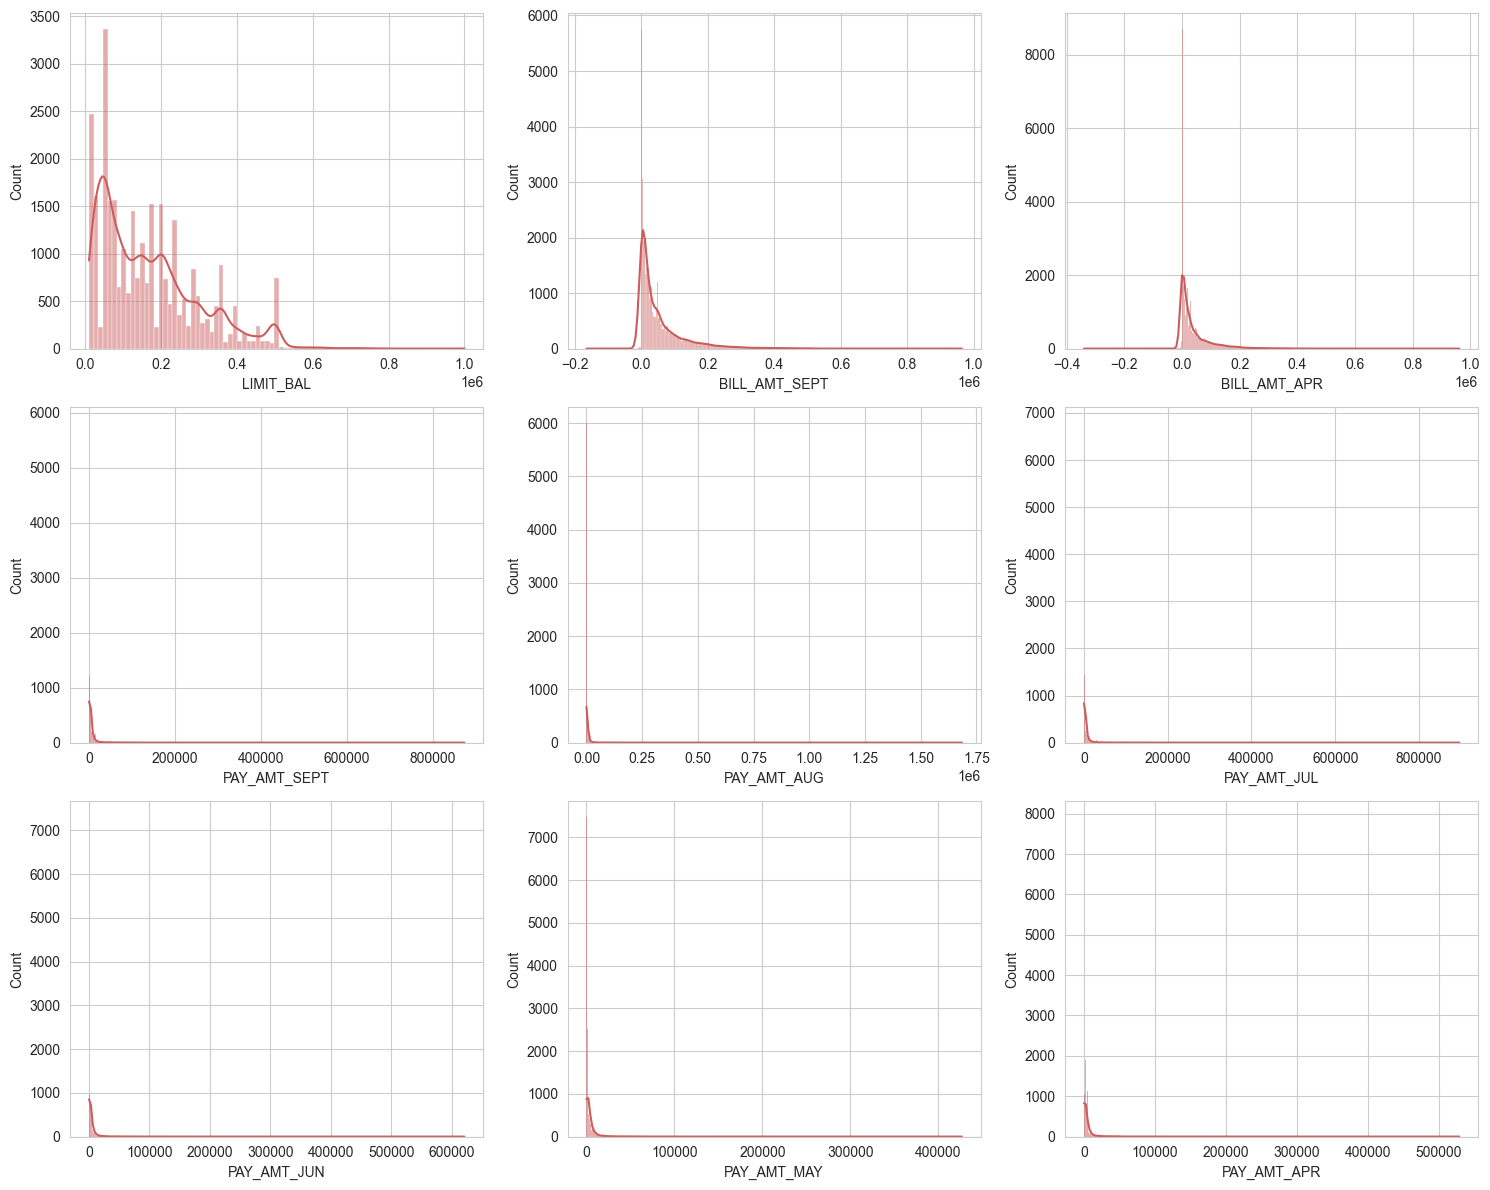

In [32]:

plt.figure(figsize=(15, 12))
for i, col in enumerate(['LIMIT_BAL', 'BILL_AMT_SEPT', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=X[col], color='indianred',kde=True)
    plt.xlabel(col)
    plt.tight_layout()


- All data('LIMIT_BAL', 'BILL_AMT_SEPT', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR' columns) were right skewed

For right-skewed data, where the tail of the distribution extends to the right, common transformations include:

**Log Transformation:** Taking the logarithm of the data can compress the larger values and spread out the smaller values, potentially reducing the skewness.

**Square Root Transformation:** Similar to the log transformation, but less aggressive. It can help reduce the right skewness of the data.

**Cube Root Transformation:** Another option that can be less aggressive than the log transformation but still effective in reducing skewness.

**Reciprocal Transformation:** Taking the reciprocal (1/x) of the data can also be used to reduce right skewness, especially if the data is very right-skewed and predominantly consists of small values.

**Box-Cox Transformation:** This is a more general transformation that includes both the logarithmic transformation and power transformations. The Box-Cox transformation finds the lambda parameter that best reduces skewness.



* Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

**Checking Skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [33]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

LIMIT_BAL         0.992867
BILL_AMT_SEPT     2.663861
BILL_AMT_APR      2.846645
PAY_AMT_SEPT     14.668364
PAY_AMT_AUG      30.453817
PAY_AMT_JUL      17.216635
PAY_AMT_JUN      12.904985
PAY_AMT_MAY      11.127417
PAY_AMT_APR      10.640727
dtype: float64

- Positiviely Skewed :All the provided skewness values suggest right-skewed distributions.

- We can handle outliers and then check the skewness.

## Apply Power Transformer to Check if it can reduces the outliers

In [34]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['LIMIT_BAL', 'BILL_AMT_SEPT', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
X_copy = pt.fit_transform(X[transform_features])

In [35]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

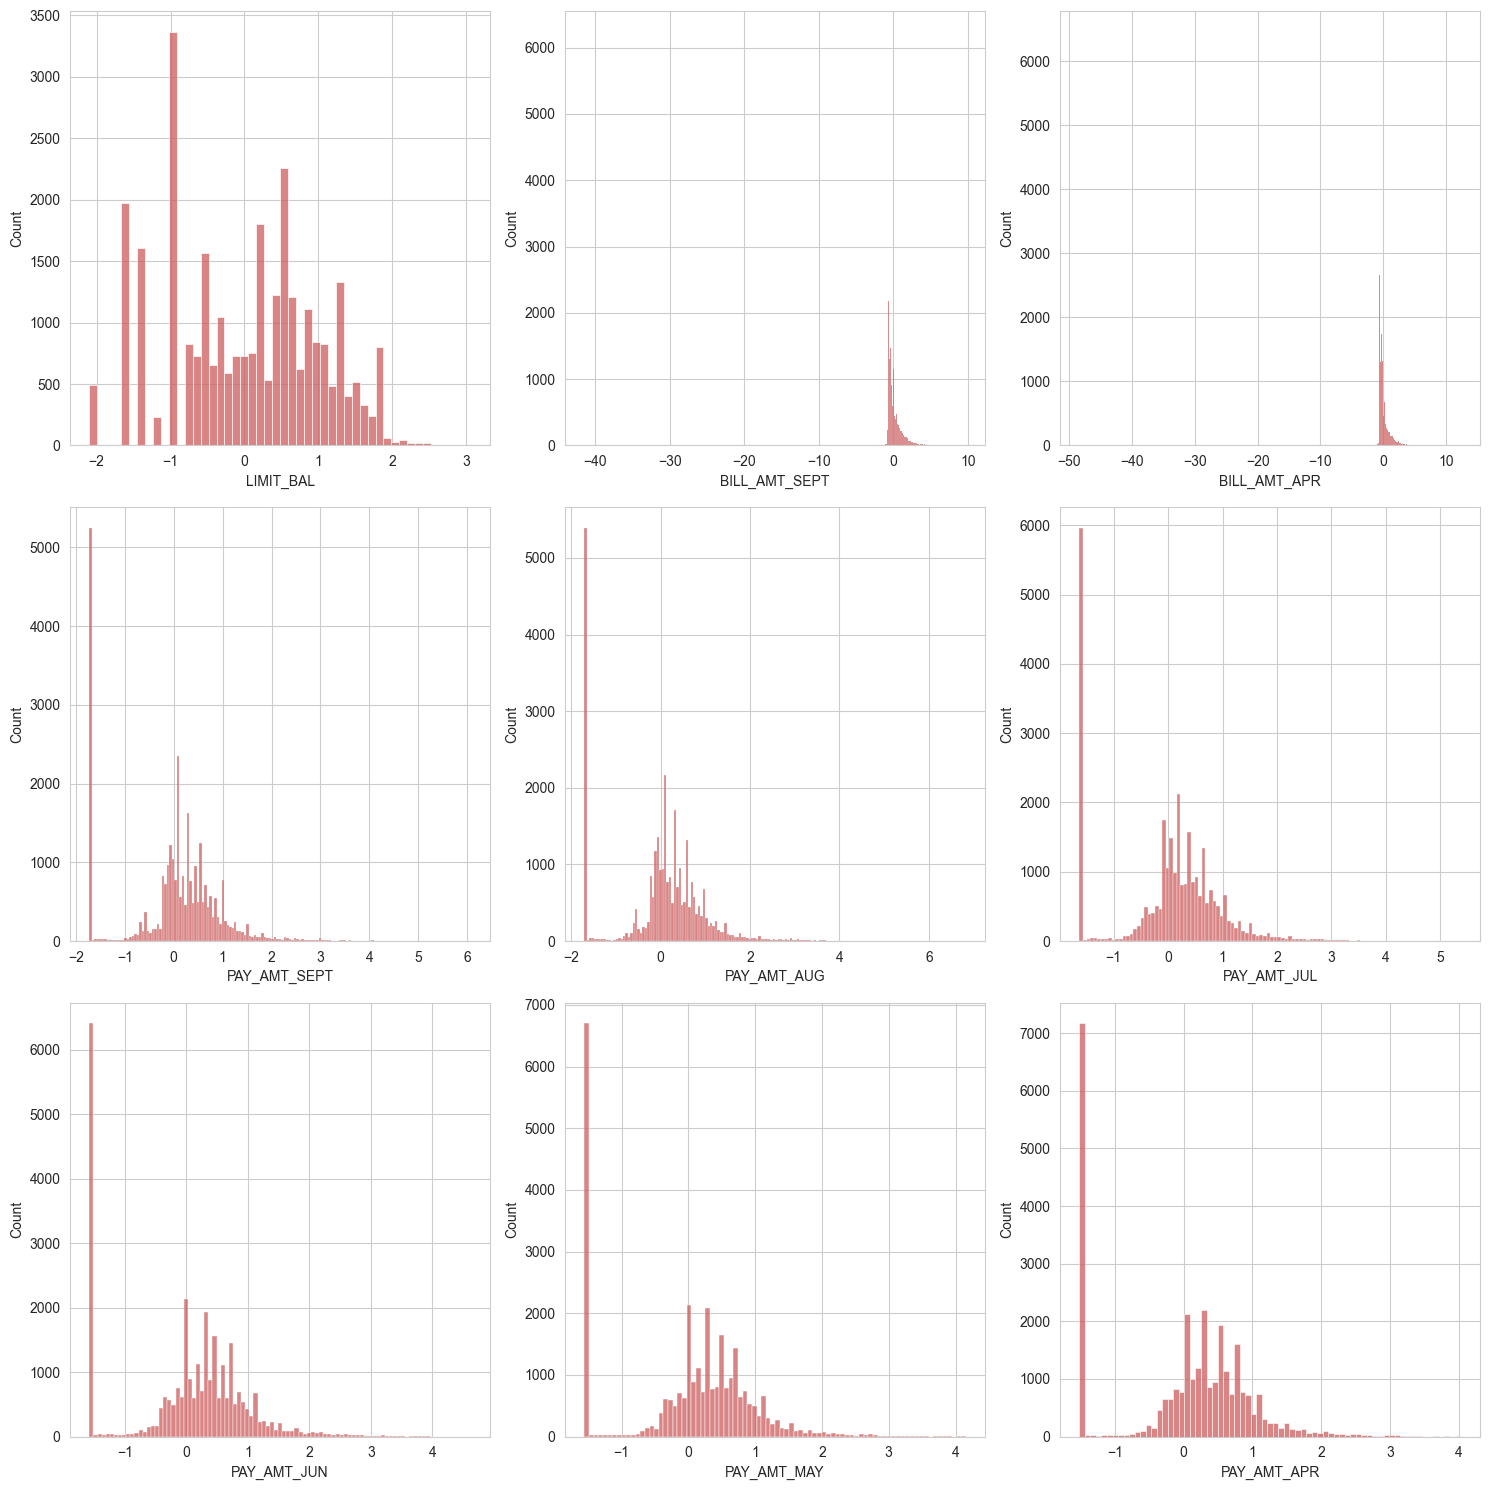

In [36]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(transform_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Checking Skewness**

In [37]:
X_copy.skew(axis=0, skipna=True)

LIMIT_BAL       -0.075402
BILL_AMT_SEPT   -2.448036
BILL_AMT_APR    -3.025677
PAY_AMT_SEPT    -0.133111
PAY_AMT_AUG     -0.112972
PAY_AMT_JUL     -0.151916
PAY_AMT_JUN     -0.165690
PAY_AMT_MAY     -0.178923
PAY_AMT_APR     -0.175019
dtype: float64

## After applying the yeo-johnson transformation all contiune features are removed right skewed and the resulting contiune features are approximately symmetric distributions.







- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [38]:

X_copy

,LIMIT_BAL,BILL_AMT_SEPT,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,-1.665383,-0.654786,-0.656065,-1.724472,-0.347889,-1.629996,-1.578070,-1.556978,-1.515825
1,-0.090364,-0.679304,-0.580055,-1.724472,-0.202757,-0.080144,0.009080,-1.556978,0.332020
2,-0.396704,-0.239392,-0.343748,-0.064485,-0.031718,-0.080144,0.009080,0.018806,0.741487
3,-0.953920,0.017236,-0.097838,0.063555,0.102920,-0.006222,0.046787,0.044891,0.059121
4,-0.953920,-0.568415,-0.279323,0.063555,1.948535,1.066641,1.057406,-0.121440,-0.080835
...,...,...,...,...,...,...,...,...,...
29995,0.637616,1.802697,-0.335927,0.875944,1.467718,0.668590,0.491133,0.739442,0.059121
29996,0.164019,-0.700317,-0.656065,0.023264,0.378656,1.002584,-0.666948,-1.556978,-1.515825
29997,-1.371928,-0.661598,-0.275300,-1.724472,-1.705383,1.587034,0.648057,0.304945,0.520536
29998,-0.515484,-0.963596,0.225154,2.836778,0.361063,-0.013840,0.281386,2.230110,0.289507


## For left-skewed data, where the tail of the distribution extends to the left, you would typically use transformations that bring the higher values closer together and spread out the lower values. Some common transformations for left-skewed data include:

**Square Transformation:** Squaring the data tends to compress the lower values and spread out the higher values, potentially reducing left skewness.

**Cube Transformation:** Similar to squaring, cubing the data can further compress the lower values and spread out the higher values.

**Square Root Transformation:** Taking the square root of the data can reduce the magnitude of larger values more than smaller values, potentially reducing left skewness.

**Logarithmic Transformation:** Although more commonly used for right-skewed data, a logarithmic transformation can also be applied to left-skewed data, especially if the left skewness is caused by exponentially increasing values.

**Inverse Transformation:** Taking the reciprocal (1/x) of the data can also be used to reduce left skewness, especially if the data is very left-skewed and predominantly consists of larger values.

In [39]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

## Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting number features for preprocessing**

In [40]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [41]:
num_features

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'PAY_SEPT',
 'PAY_AUG',
 'PAY_JUL',
 'PAY_JUN',
 'PAY_MAY',
 'PAY_APR',
 'BILL_AMT_SEPT',
 'BILL_AMT_APR',
 'PAY_AMT_SEPT',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR']

### **Preprocessing using Column Transformer**

In [42]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline


num_features=['EDUCATION','MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']

transform_columns = [
    'LIMIT_BAL', 'BILL_AMT_SEPT', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
    'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR'
    ]

# Define transformers
scaler = StandardScaler()
power_transformer = PowerTransformer(method='yeo-johnson')

# Define transformers in a pipeline
transform_pipe = Pipeline(steps=[
    ('transformer', power_transformer)
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", scaler, num_features)  # Add more transformers if needed
    ],
    remainder='passthrough'  # Pass through columns not specified
)


In [43]:
# we can use code for another projects
# Create Column Transformer with 3 types of transformers
#or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
#oh_columns = ['continent','unit_of_wage','region_of_employment']
#transform_columns= ['no_of_employees','company_age']

#from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
#from sklearn.compose import ColumnTransformer 
#from sklearn.pipeline import Pipeline

#numeric_transformer = StandardScaler()
#oh_transformer = OneHotEncoder()
#ordinal_encoder = OrdinalEncoder()

#transform_pipe = Pipeline(steps=[
 #   ('transformer', PowerTransformer(method='yeo-johnson'))
#])

#preprocessor = ColumnTransformer(
 ##       ("OneHotEncoder", oh_transformer, oh_columns),
   #     ("Ordinal_Encoder", ordinal_encoder, or_columns),
    #    ("Transformer", transform_pipe, transform_columns),
     #   ("StandardScaler", numeric_transformer, num_features)
   # ]
#)

In [44]:
X = preprocessor.fit_transform(X)


In [45]:
X

array([[-1.66538276, -0.65478577, -0.65606507, ..., -0.33999038,
        -0.30862144, -0.31668782],
       [-0.09036414, -0.67930421, -0.58005453, ..., -0.33999038,
        -0.30862144,  2.47884979],
       [-0.39670383, -0.23939206, -0.34374812, ..., -0.33999038,
        -0.30862144, -0.31668782],
       ...,
       [-1.37192788, -0.66159825, -0.27529964, ..., -0.33999038,
        -0.30862144, -0.31668782],
       [-0.51548415, -0.96359638,  0.2251537 , ..., -0.33999038,
        -0.30862144, -0.31668782],
       [-0.95391983,  0.03040899, -0.34803946, ..., -0.33999038,
        -0.30862144, -0.31668782]])

In [46]:
X.shape

(30000, 17)

# Classification

In [47]:
from collections import Counter
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
print(len(X),len(y))
X_res, y_res = smt.fit_resample(X, y)
len(X_res), len(y_res) 

30000 30000


  File "c:\Users\DELL\anaconda3\envs\demo_project\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\DELL\anaconda3\envs\demo_project\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\DELL\anaconda3\envs\demo_project\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\DELL\anaconda3\envs\demo_project\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


(29800, 29800)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [48]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((23840, 17), (5960, 17))

In [49]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [50]:
def evaluate_clf(true, predicted):
    accuracy = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return accuracy, f1 , precision, recall, roc_auc

In [51]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [52]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [53]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9310
- F1 score: 0.9415
- Precision: 0.9524
- Recall: 0.9307
- Roc Auc Score: 0.9311


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8673
- F1 score: 0.8898
- Precision: 0.8804
- Recall: 0.8995
- Roc Auc Score: 0.8597


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8490
- F1 score: 0.8654
- Precision: 0.9106
- Recall: 0.8245
- Roc Auc Score: 0.8543
----------------------------------
Model performance for Test set
- Accuracy: 0.8485
- F1 score: 0.8662
- Precision: 0.9143
- Recall: 0.8229
- Roc Auc Score: 0.8546


Logistic Regression
Model performance for Training 

**Results of All Models**

In [54]:
base_model_report

,Model Name,Accuracy
4,K-Neighbors Classifier,0.932550
0,Random Forest,0.931040
6,CatBoosting Classifier,0.909564
5,XGBClassifier,0.904866
1,Decision Tree,0.867282
2,Gradient Boosting,0.848490
7,Support Vector Classifier,0.810738
8,AdaBoost Classifier,0.803356
3,Logistic Regression,0.785570


**Here we can use Random Forest for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest**

In [55]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [56]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [57]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [58]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

## Retraining the Model with best Parameters

In [59]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9322
- F1 score: 0.9424
- Precision: 0.9552
- Recall: 0.9299
- Roc Auc Score: 0.9328


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9641
- F1 score: 0.9704
- Precision: 0.9523
- Recall: 0.9893
- Roc Auc Score: 0.9581


XGBClassifier
Model performance for Training set
- Accuracy: 0.9950
- F1 score: 0.9957
- Precision: 0.9978
- Recall: 0.9937
- Roc Auc Score: 0.9952
----------------------------------
Model performance for Test set
- Accuracy: 0.9169
- F1 score: 0.9293
- Precision: 0.9426
- Recall: 0.9164
- Roc Auc Score: 0.9171




In [60]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.964094
0,Random Forest Classifier,0.932215
2,XGBClassifier,0.916946


In [61]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9641
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2409
           1       0.95      0.99      0.97      3551

    accuracy                           0.96      5960
   macro avg       0.97      0.96      0.96      5960
weighted avg       0.96      0.96      0.96      5960



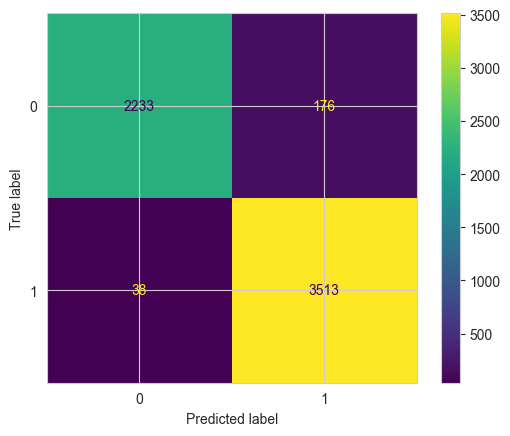

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

### Best Model is K-Nearest Neighbor(KNN) with Accuracy 96.41%
